Saving facebook_combined.txt to facebook_combined (2).txt
Number of nodes: 4039
Number of edges: 88234
Graph density: 0.010819963503439287
Top nodes by Betweenness Centrality: [107, 1684, 3437, 1912, 1085]
Top nodes by Degree Centrality: [107, 1684, 1912, 3437, 0]
Top nodes by Closeness Centrality: [107, 58, 428, 563, 1684]
Top nodes by Eigenvector Centrality: [1912, 2266, 2206, 2233, 2464]
Shortest Path between Node 20 ---> 650 is [20, 0, 34, 414, 650], Length = 4
Shortest Path between Node 40 ---> 802 is [40, 0, 58, 1684, 860, 698, 686, 802], Length = 7
Shortest Path between Node 65 ---> 920 is [65, 0, 107, 920], Length = 3
Shortest Path between Node 75 ---> 1010 is [75, 0, 107, 1010], Length = 3


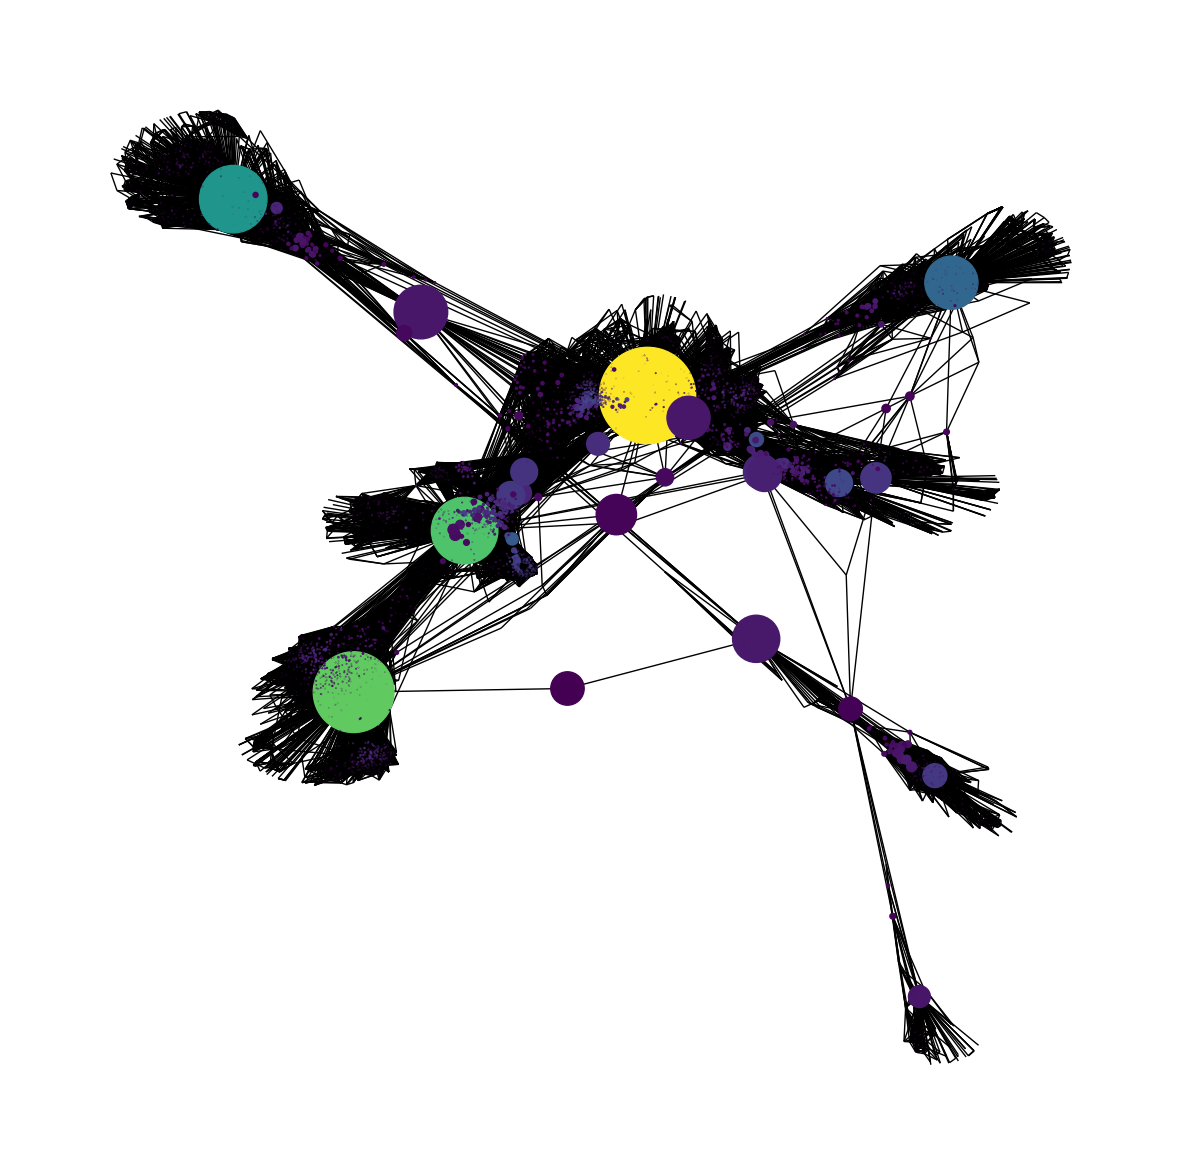

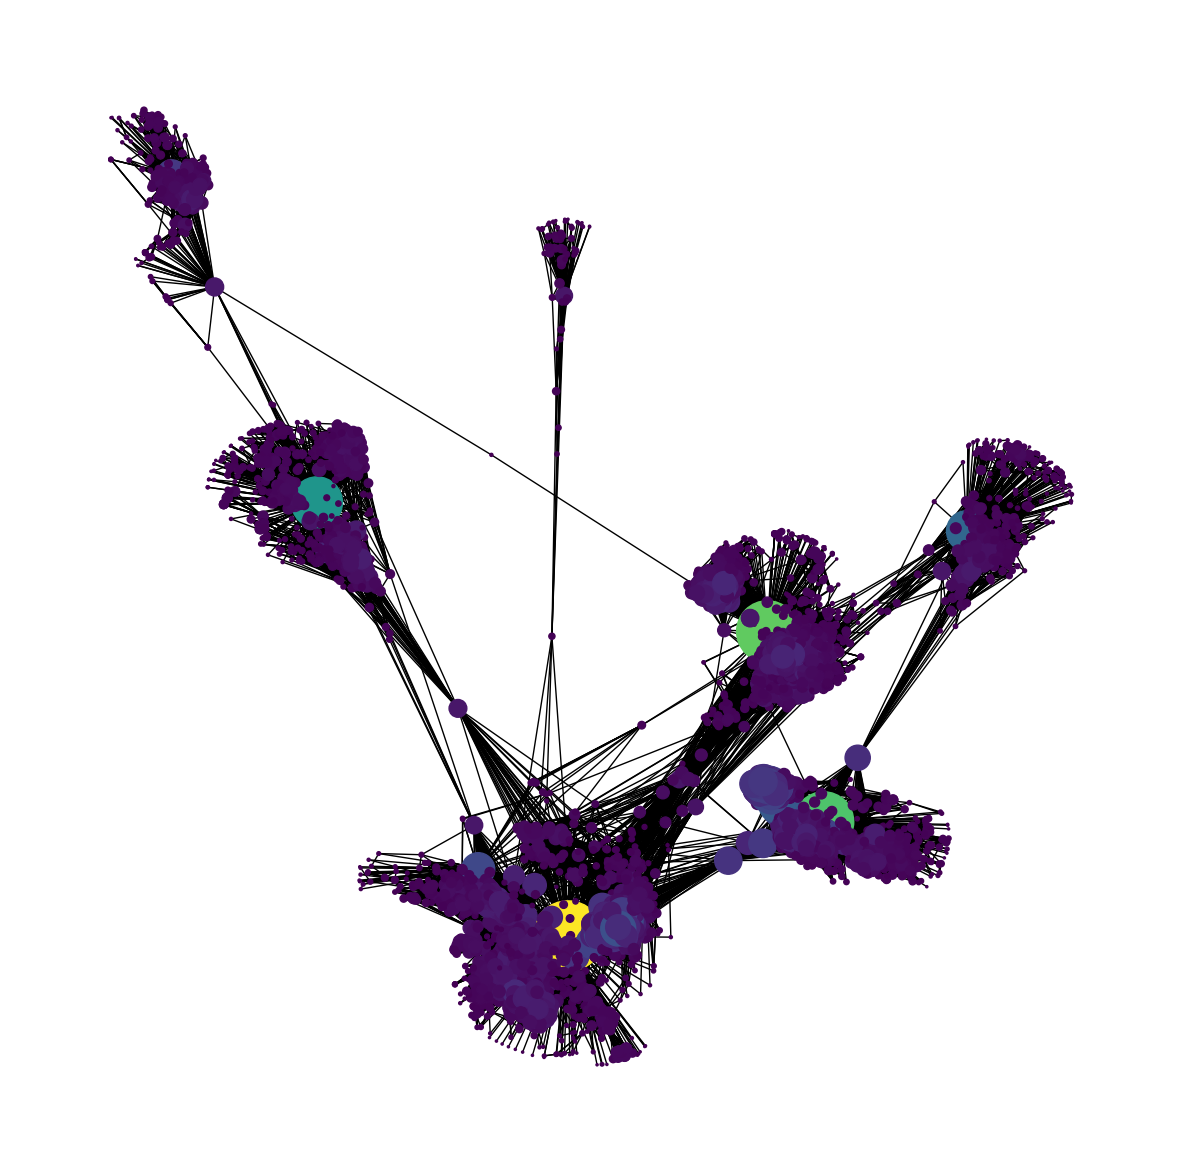

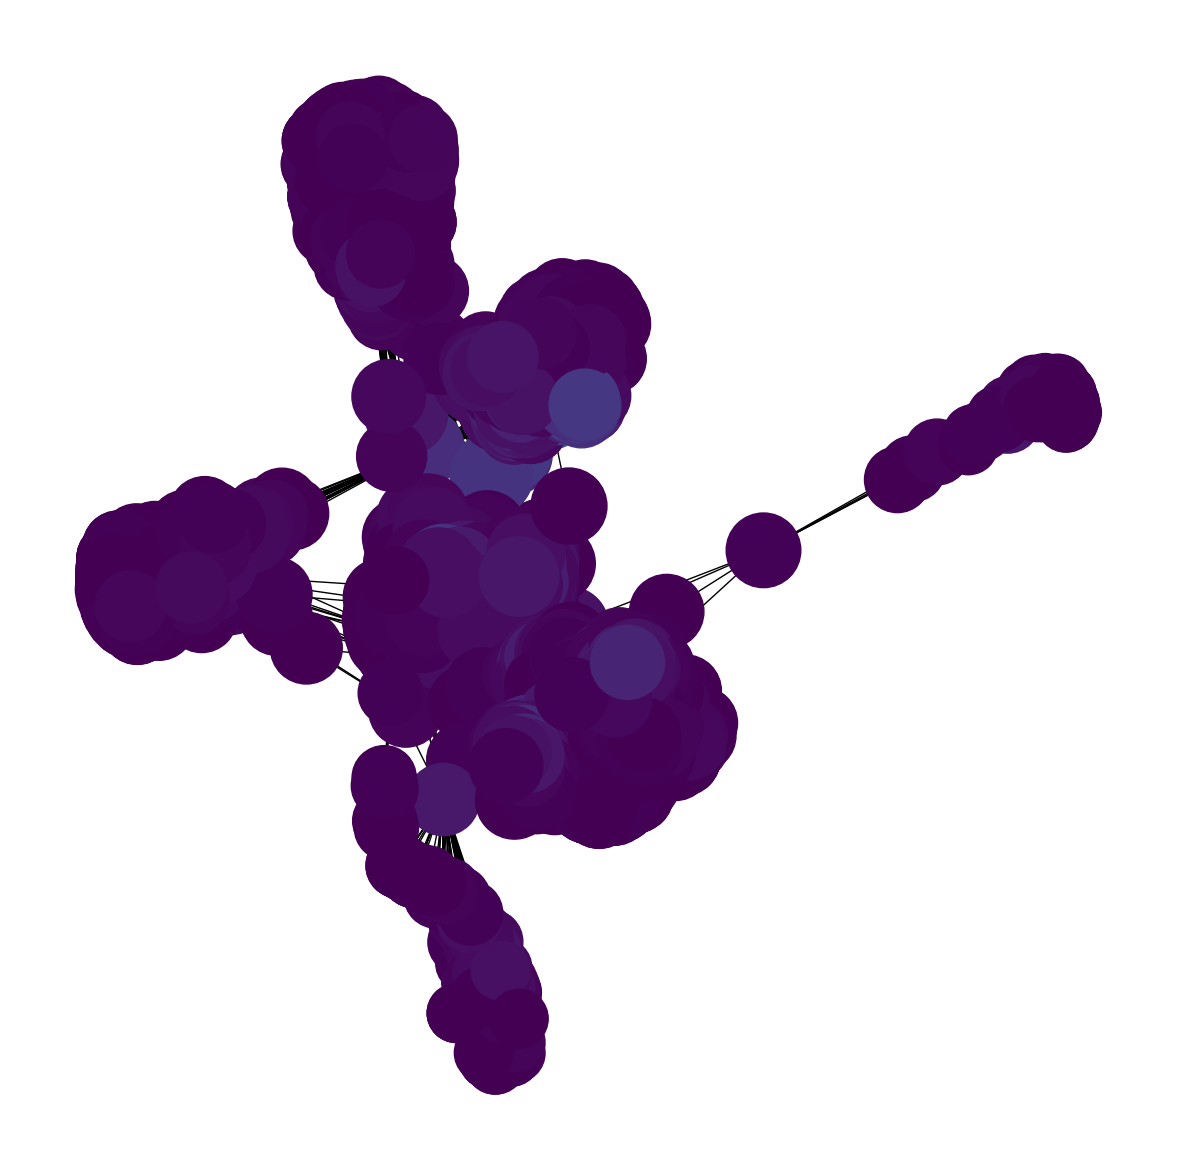

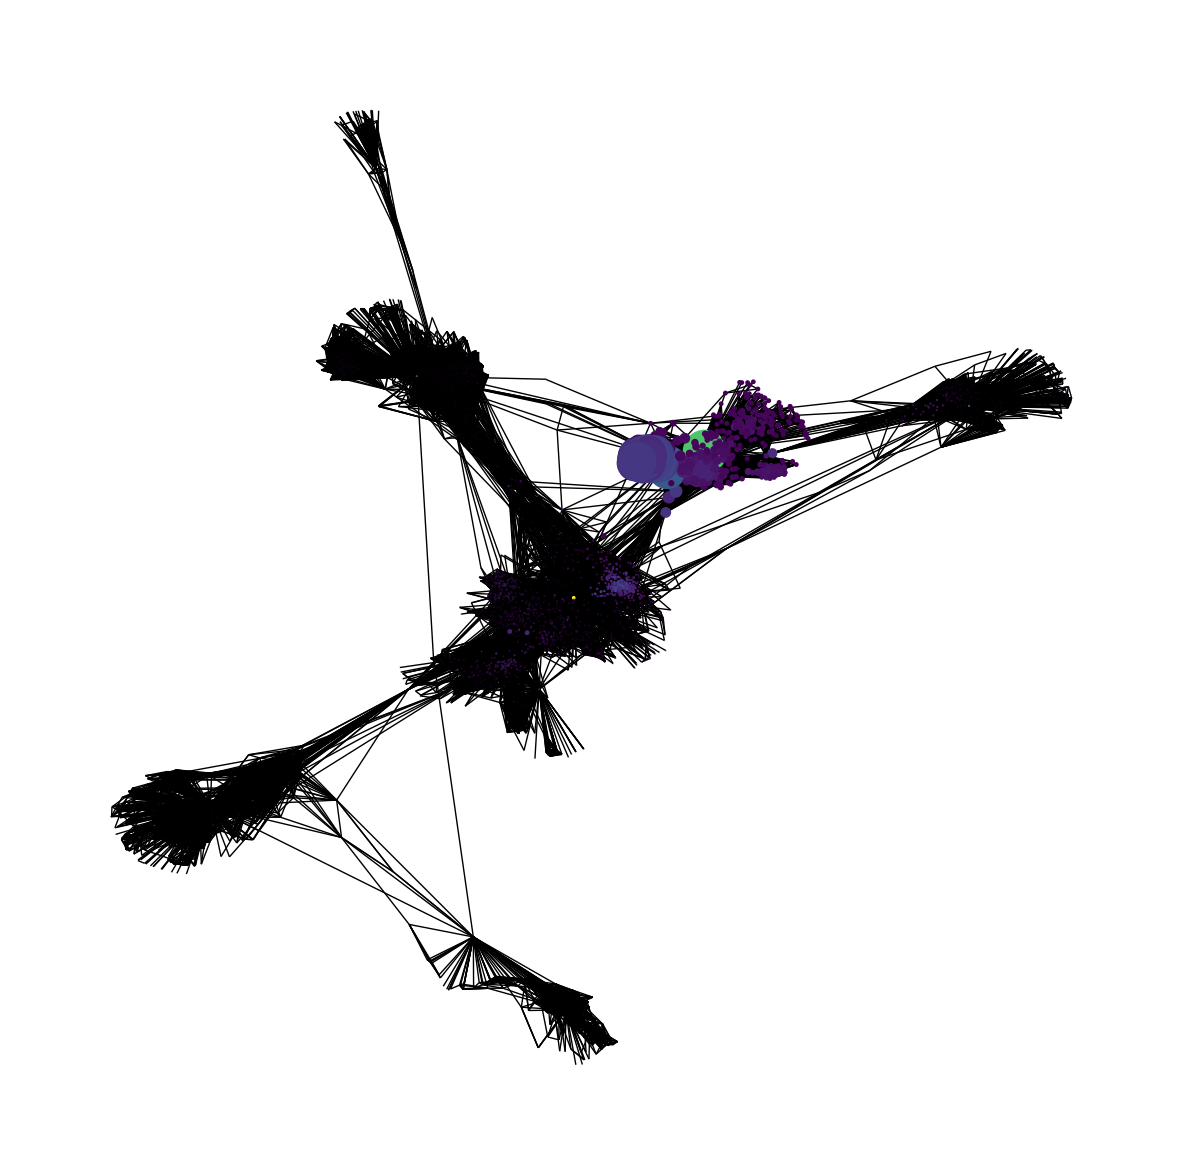

In [6]:
from google.colab import files

# Upload the dataset file
uploaded = files.upload()

# Read and process the uploaded file
for file_name in uploaded.keys():
    with open(file_name, 'wb') as f:
        f.write(uploaded[file_name])

# Continue with the code
import networkx as nx
import matplotlib.pyplot as plt

def plot_centrality(G, centrality_measure, title):
    pos = nx.spring_layout(G)
    centrality = centrality_measure(G)
    node_color = [20000.0 * G.degree(v) for v in G]
    node_size = [v * 10000 for v in centrality.values()]
    plt.figure(figsize=(15, 15))
    nx.draw_networkx(G, pos=pos, with_labels=False, node_color=node_color, node_size=node_size)
    plt.axis('off')
    top_nodes = sorted(centrality, key=centrality.get, reverse=True)[:5]
    print(f"Top nodes by {title}: {top_nodes}")

G1 = nx.read_edgelist(file_name, create_using=nx.Graph(), nodetype=int)

# Retrieve basic graph information
num_nodes = len(G1.nodes())
num_edges = len(G1.edges())
density = nx.density(G1)

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
print("Graph density:", density)

# Calculate and plot different centrality measures
plot_centrality(G1, nx.betweenness_centrality, "Betweenness Centrality")
plot_centrality(G1, nx.degree_centrality, "Degree Centrality")
plot_centrality(G1, nx.closeness_centrality, "Closeness Centrality")
plot_centrality(G1, nx.eigenvector_centrality, "Eigenvector Centrality")

# Calculate and print shortest paths
sources = [20, 40, 65, 75]
targets = [650, 802, 920, 1010]
for source, target in zip(sources, targets):
    path = nx.shortest_path(G1, source=source, target=target)
    length = nx.shortest_path_length(G1, source=source, target=target, method='dijkstra')
    print(f"Shortest Path between Node {source} ---> {target} is {path}, Length = {length}")
